![](img/the_real_reason.png)






# PyTorch Overview

PyTorch uses an imperative / eager paradigm. That is, each line of code required to build a graph defines a component of that graph. We can independently perform computations on these components itself, even before your graph is built completely. This is called “define-by-run” methodology.

![](img/dynamic_graph.gif)

This is a much better explanation of PyTorch (I think)

In [ ]:
import torch
from IPython.core.debugger import set_trace

def f(x):
    res = x + x
    set_trace()  # <-- OMG! =D
    return res

x = torch.randn(1, 10)
f(x)

> <ipython-input-1-72089dcf9312>(7)f()
      5     res = x + x
      6     set_trace()  # <-- OMG! =D
----> 7     return res
      8 
      9 x = torch.randn(1, 10)

ipdb> x
tensor([[ 0.9527,  1.2284,  0.2374,  0.3110,  0.3224,  1.6226, -0.1946,  0.8746,
          0.4749, -0.2934]])


I like pytorch because
- "it's just stupid python"
- easy to debug
- nice and extensible interface
- research-y feel
- research is often published as pytorch project


But also Tensorflow has its advantages:
-  fast in some cases (multiple machines)
-  deployment
-  Visualization
-  documentation


# PyTorch Basics

## Init, helpers, utils, ...

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision

In [2]:
import matplotlib.pyplot as plt
from pprint import pprint
import numpy as np
from IPython.core.debugger import set_trace
%matplotlib inline

# Tensors
Tensors - the atoms of machine learning


## PyTorch as NumPy

In [3]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import multi_dot as mdot

In [4]:
import torch

In [5]:
# numpy
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
# torch
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [7]:
# numpy
X = np.random.random((5, 3))
X

array([[0.2466819 , 0.632842  , 0.89119311],
       [0.77079608, 0.10957379, 0.01142741],
       [0.0501221 , 0.73080843, 0.75285245],
       [0.42087822, 0.40558455, 0.21842931],
       [0.61992209, 0.75119631, 0.55434517]])

In [8]:
# pytorch
Y = torch.rand((5, 3))
Y

tensor([[0.2083, 0.8134, 0.6836],
        [0.1490, 0.5247, 0.1851],
        [0.9102, 0.8258, 0.4530],
        [0.5562, 0.6065, 0.6818],
        [0.9099, 0.0940, 0.2565]])

In [9]:
# numpy
X.shape

(5, 3)

In [10]:
# torch
Y.shape

torch.Size([5, 3])

In [11]:
# numpy
X.T @ X

array([[1.21893267, 0.91358426, 0.70196692],
       [0.91358426, 1.6753711 , 1.6204411 ],
       [0.70196692, 1.6204411 , 1.71615249]])

In [12]:
# torch
Y.t() @ Y

tensor([[2.0313, 1.4222, 1.1950],
        [1.4222, 1.9955, 1.4649],
        [1.1950, 1.4649, 1.2374]])

In [13]:
# numpy
inv(X.T @ X)

array([[  2.00389971,  -3.45835662,   2.44581522],
       [ -3.45835662,  12.85062471, -10.71934372],
       [  2.44581522, -10.71934372,   9.70379018]])

In [14]:
# torch
torch.inverse(Y.t() @ Y)

tensor([[ 1.1400, -0.0330, -1.0618],
        [-0.0330,  3.8270, -4.4985],
        [-1.0618, -4.4985,  7.1589]])

## More on PyTorch Tensors

Operations are also available as methods.

In [15]:
A = torch.eye(3)
A.add(1)

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [16]:
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [17]:
A.add_(1)
A

tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

## Indexing and broadcasting


In [18]:
A[0, 0]

tensor(2.)

In [19]:
A[0]

tensor([2., 1., 1.])

In [20]:
A[0:2]

tensor([[2., 1., 1.],
        [1., 2., 1.]])

In [21]:
A[:, 1:3]

tensor([[1., 1.],
        [2., 1.],
        [1., 2.]])

In [22]:
print(A.shape)
A

torch.Size([3, 3])


tensor([[2., 1., 1.],
        [1., 2., 1.],
        [1., 1., 2.]])

In [23]:
B= torch.rand((1, 3))
print(B.shape)
B

torch.Size([1, 3])


tensor([[0.5545, 0.5392, 0.3096]])

In [24]:
A+B

tensor([[2.5545, 1.5392, 1.3096],
        [1.5545, 2.5392, 1.3096],
        [1.5545, 1.5392, 2.3096]])

## Converting

In [25]:
A = torch.eye(3)
A

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [26]:
# torch --> numpy
A.numpy()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [27]:
# numpy --> torch
torch.from_numpy(np.eye(3))

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]], dtype=torch.float64)

# autograd

In [28]:
from torch import autograd  # you rarely use it directly


Suppose, your model is described like this:

b = w1 * a

c = w2 * a 

d = (w3 * b) + (w4 * c)

L = f(d)

<img src="img/image1.png" width="450">

<img src="img/image2.png" width="450">

In [28]:
b = torch.ones(1)
print(b.data)
print(b.grad)
print(b.requires_grad)


tensor([1.])
None
False


<img src="img/image3.png" width="450">

In [30]:
w = torch.ones(1, requires_grad=True)
w.requires_grad


True

In [31]:
z = torch.ones(1) * 2
print(z)
z.requires_grad

tensor([2.])


False

In [32]:
total = w + z
total

tensor([3.], grad_fn=<ThAddBackward>)

In [33]:
total.backward()
w.grad

tensor([1.])

In [34]:
total.backward()
w.grad

tensor([2.])

In [35]:
total.backward()
w.grad

tensor([3.])

In [36]:
with torch.no_grad():
    total = w + z

total.requires_grad

False

# But what about the GPU?
How do I use the GPU?

If you have a GPU make sure that the right pytorch is installed

```
conda install pytorch torchvision cuda91 -c pytorch
```
Check https://pytorch.org/ for details.

In [37]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

If you have a GPU you should get something like: 
`device(type='cuda', index=0)`

You can move data to the GPU by doing `.to(device)`.

In [38]:
data = torch.eye(3)
data.to(device)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

# NN module

In [40]:
from collections import OrderedDict

import torch.nn as nn
import torch.nn.functional as F

# Simple sequential model
layers = OrderedDict([
    ('conv1', nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5)),
    ('relu1', nn.ReLU()),
    ('conv2', nn.Conv2d(20,64,5)),
    ('relu2', nn.ReLU())
])
model = nn.Sequential(layers)

# output = model(some_input)

Also if we want to build more complex models, we may subclass provided nn.Module class. And of course, these two approaches can be mixed with each other.

In [41]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16 * 5 * 5, out_features=120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


# LinReg with PyTorch, Gradient Descent, and GPU

(100,)


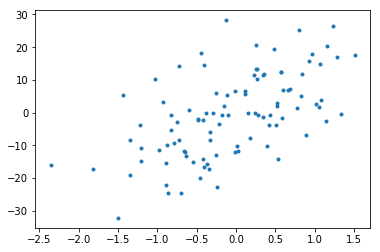

In [40]:
import sklearn
from sklearn.datasets import make_regression

n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=10,
)
print(y.shape)
fix, ax = plt.subplots()
ax.plot(X, y, ".")

In [41]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, 1))).float()

In [42]:

from torch import nn
from torch import optim

class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

In [43]:
# Move everything to GPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = LinReg(n_features).to(device)  # <-- here
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

X, y = X.to(device), y.to(device)  # <-- here

In [44]:
# Print out model parameters.
print ('w: ', model.beta.weight)
print ('b: ', model.beta.bias)

# Print out the gradients.
print ('dL/dw: ', model.beta.weight.grad) 
print ('dL/db: ', model.beta.bias.grad)

w:  Parameter containing:
tensor([[-0.5694]], requires_grad=True)
b:  Parameter containing:
tensor([-0.7658], requires_grad=True)
dL/dw:  None
dL/db:  None


dL/dw:  tensor([[-147.4653]])
dL/db:  tensor([-19.9145])


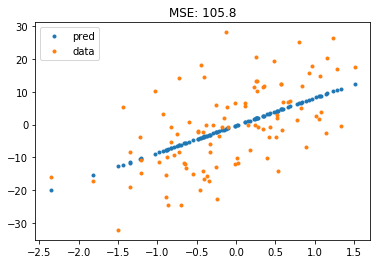

In [59]:
# Train step
model.train()
optimizer.zero_grad()

y_ = model(X)
loss = criterion(y_, y)
loss.backward(loss)
# Print out the gradients.
print ('dL/dw: ', model.beta.weight.grad) 
print ('dL/db: ', model.beta.bias.grad)

optimizer.step()
# for f in model.parameters():
#     f.data.sub_(f.grad.data * learning_rate)


# Eval
model.eval()
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

# Debugging


## IPDB cheatsheet
IPython Debugger

Taken from http://frid.github.io/blog/2014/06/05/python-ipdb-cheatsheet/



## Debuging a NN

In [48]:
from IPython.core.debugger import set_trace
X = torch.rand((5, 3))
X

tensor([[0.4554, 0.0877, 0.2672],
        [0.5362, 0.0036, 0.5139],
        [0.1420, 0.9670, 0.6439],
        [0.7929, 0.9761, 0.7763],
        [0.8374, 0.5822, 0.3811]])

In [49]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(3, 1)
    
    def forward(self, X):
        set_trace()
        x = self.lin(X)
        return X

    
model = MyModule()
y_ = model(X)

assert y_.shape == (5, 1), y_.shape

> <ipython-input-49-36ed13c8db25>(8)forward()
      6     def forward(self, X):
      7         set_trace()
----> 8         x = self.lin(X)
      9         return X
     10 

ipdb> 
ipdb> 
ipdb> exit


BdbQuit: 

# Dataset / Dataset Loader


Dataset class: It's a nice and simple abstraction to work with data.

DataLoader class offers batch loading of datasets with multi-processing and different sample strategies.

In [50]:
from torch.utils.data import Dataset


class MyDataSet(Dataset):
    def __init__(self):
        super().__init__()
        
    def __len__(self):
        return 0
    
    def __getitem__(self, idx):
        return None

In [62]:
import torch
from torch.autograd import Variable
import numpy as np

xy = np.loadtxt('./data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
print('data shape   ',xy.shape)
x_data = torch.from_numpy(xy[:, 0:-1])
y_data = torch.from_numpy(xy[:, [-1]])

print('x_data shape  ',x_data.data.shape)
print('y_data shape  ',y_data.data.shape)



data shape    (759, 9)
x_data shape   torch.Size([759, 8])
y_data shape   torch.Size([759, 1])


In [63]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader


class DiabetesDataset(Dataset):
    """ Diabetes dataset."""

    def __init__(self):
        xy = np.loadtxt('./data/diabetes.csv',
                        delimiter=',', dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:, 0:-1])
        self.y_data = torch.from_numpy(xy[:, [-1]])

    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    def __len__(self):
        return self.len


dataset = DiabetesDataset()
train_loader = DataLoader(dataset=dataset,
                          batch_size=100,
                          shuffle=True)
                          

X, y = next(iter(train_loader))
print("X:", X.shape)
print("y:", y.shape)


X: torch.Size([100, 8])
y: torch.Size([100, 1])


In [64]:

class Model(torch.nn.Module):

    def __init__(self):
        super(Model, self).__init__()
        self.l1 = torch.nn.Linear(8, 6)
        self.l2 = torch.nn.Linear(6, 4)
        self.l3 = torch.nn.Linear(4, 1)

        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):

        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

# our model
model = Model()
criterion = torch.nn.BCELoss(size_average=True )
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


# Training loop
model.train()
for epoch in range(100):
    for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data

        # Forward pass
        y_pred = model(inputs)

        # Compute and print loss
        loss = criterion(y_pred, labels)
        print(epoch, i, loss.data.item())

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

C:\Users\ameni\Anaconda3\lib\site-packages\torch\nn\functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='elementwise_mean' instead.
  warnings.warn(warning.format(ret))


0 0 0.6587796211242676
0 1 0.6636003255844116
0 2 0.6683725118637085
0 3 0.6069745421409607
0 4 0.6335617303848267
0 5 0.6280879378318787
0 6 0.6635976433753967
0 7 0.659662127494812
1 0 0.6481443047523499
1 1 0.6324760317802429
1 2 0.6263129115104675
1 3 0.6147372722625732
1 4 0.6413322687149048
1 5 0.6471760272979736
1 6 0.6811887621879578
1 7 0.6979438662528992
2 0 0.6476355195045471
2 1 0.6368202567100525
2 2 0.6473640203475952
2 3 0.6638011932373047
2 4 0.6472982168197632
2 5 0.6974446177482605
2 6 0.6311383247375488
2 7 0.5569713115692139
3 0 0.5824112892150879
3 1 0.6771924495697021
3 2 0.7249203324317932
3 3 0.6412944793701172
3 4 0.6411029696464539
3 5 0.6296011805534363
3 6 0.5821208357810974
3 7 0.7126212120056152
4 0 0.6173632144927979
4 1 0.6408743262290955
4 2 0.6467642784118652
4 3 0.6527724266052246
4 4 0.6287238001823425
4 5 0.6224675178527832
4 6 0.6713994741439819
4 7 0.7025353312492371
5 0 0.6112071871757507
5 1 0.6466808319091797
5 2 0.6711805462837219
5 3 0.646853

54 3 0.6843398809432983
54 4 0.6466639637947083
54 5 0.6088714003562927
54 6 0.6401572227478027
54 7 0.6721425652503967
55 0 0.6023809909820557
55 1 0.6722416877746582
55 2 0.6531356573104858
55 3 0.646728515625
55 4 0.5958636403083801
55 5 0.6463602185249329
55 6 0.7044380307197571
55 7 0.6287176609039307
56 0 0.6273528933525085
56 1 0.6463662981987
56 2 0.6465644836425781
56 3 0.6215323805809021
56 4 0.6270335912704468
56 5 0.6142587065696716
56 6 0.7055595517158508
56 7 0.6824511885643005
57 0 0.7025354504585266
57 1 0.6405131816864014
57 2 0.5852620601654053
57 3 0.6213696002960205
57 4 0.691608726978302
57 5 0.6089012622833252
57 6 0.6782861351966858
57 7 0.6177826523780823
58 0 0.6465227007865906
58 1 0.6527511477470398
58 2 0.7158172726631165
58 3 0.6224266886711121
58 4 0.6153160929679871
58 5 0.614905834197998
58 6 0.6400168538093567
58 7 0.6504883766174316
59 0 0.6275389790534973
59 1 0.6463021039962769
59 2 0.6718913912773132
59 3 0.6462603807449341
59 4 0.5959019064903259
5

# Control Flow + Weight sharing

As an example of dynamic graphs and weight sharing, we implement a very strange model: a fully-connected ReLU network that on each forward pass chooses a random number between 1 and 4 and uses that many hidden layers, reusing the same weights multiple times to compute the innermost hidden layers.
For this model we can use normal Python flow control to implement the loop, and we can implement weight sharing among the innermost layers by simply reusing the same Module multiple times when defining the forward pass.
We can easily implement this model as a Module subclass:

In [54]:
# -*- coding: utf-8 -*-
import random
import torch


class DynamicNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we construct three nn.Linear instances that we will use
        in the forward pass.
        """
        super(DynamicNet, self).__init__()
        self.input_linear = torch.nn.Linear(D_in, H)
        self.middle_linear = torch.nn.Linear(H, H)
        self.output_linear = torch.nn.Linear(H, D_out)

    def forward(self, x):
        """
        For the forward pass of the model, we randomly choose either 0, 1, 2, or 3
        and reuse the middle_linear Module that many times to compute hidden layer
        representations.

        Since each forward pass builds a dynamic computation graph, we can use normal
        Python control-flow operators like loops or conditional statements when
        defining the forward pass of the model.

        Here we also see that it is perfectly safe to reuse the same Module many
        times when defining a computational graph. This is a big improvement from Lua
        Torch, where each Module could be used only once.
        """
        h_relu = self.input_linear(x).clamp(min=0)
        for _ in range(random.randint(0, 3)):
            h_relu = self.middle_linear(h_relu).clamp(min=0)
        y_pred = self.output_linear(h_relu)
        return y_pred


# N is batch size; D_in is input dimension;
# H is hidden dimension; D_out is output dimension.
N, D_in, H, D_out = 64, 1000, 100, 10

# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

# Construct our model by instantiating the class defined above
model = DynamicNet(D_in, H, D_out)

# Construct our loss function and an Optimizer. Training this strange model with
# vanilla stochastic gradient descent is tough, so we use momentum
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4, momentum=0.9)
for t in range(500):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)

    # Compute and print loss
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 677.3978881835938
1 672.4699096679688
2 700.7490234375
3 670.8538818359375
4 606.662109375
5 666.2186279296875
6 640.1378173828125
7 659.9547119140625
8 621.1004638671875
9 664.2947387695312
10 359.8459167480469
11 661.3030395507812
12 575.29345703125
13 277.2897033691406
14 244.0753631591797
15 203.68663024902344
16 161.58023071289062
17 648.961669921875
18 98.31787109375
19 481.28948974609375
20 457.67791748046875
21 421.7212219238281
22 375.3182373046875
23 564.3938598632812
24 140.8961639404297
25 240.03411865234375
26 150.39370727539062
27 551.97802734375
28 122.7464599609375
29 96.68204498291016
30 475.8066711425781
31 144.64871215820312
32 129.384521484375
33 403.78546142578125
34 364.97369384765625
35 260.8961486816406
36 56.2715950012207
37 51.43171691894531
38 234.08982849121094
39 42.36616897583008
40 42.942440032958984
41 175.8275604248047
42 20.457427978515625
43 179.55850219726562
44 161.96942138671875
45 99.48065185546875
46 53.00577926635742
47 410.46136474609375
48 2

379 1.4783087968826294
380 18.314647674560547
381 51.904884338378906
382 18.268234252929688
383 4.802370071411133
384 10.454974174499512
385 0.906532347202301
386 15.953115463256836
387 1.572950005531311
388 1.129738450050354
389 46.75904083251953
390 2.0352675914764404
391 5.6702165603637695
392 4.322254180908203
393 4.696719169616699
394 13.231590270996094
395 7.289726257324219
396 5.148725509643555
397 3.425673246383667
398 4.7888336181640625
399 7.813744068145752
400 2.041982650756836
401 1.7228134870529175
402 3.482633590698242
403 2.5991673469543457
404 3.2600789070129395
405 1.8871153593063354
406 1.9047726392745972
407 1.6865788698196411
408 2.2055680751800537
409 1.9000658988952637
410 2.945162296295166
411 1.4536107778549194
412 1.3652088642120361
413 2.598534107208252
414 0.8209268450737
415 8.582776069641113
416 5.291280746459961
417 10.996499061584473
418 4.261285781860352
419 1.1843098402023315
420 0.9513518810272217
421 2.149409294128418
422 2.5198466777801514
423 1.0805